In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

import os
from pathlib import Path
import re

import tensorflow as tf

In [37]:
train_dir = '/content/pokemon/images'
train_path = Path(train_dir)
train_path

PosixPath('/content/pokemon/images')

In [38]:
files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]

image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))
image_df

,Name,Filepath
0,buneary,/content/pokemon/images/buneary.png
1,skiddo,/content/pokemon/images/skiddo.png
2,magikarp,/content/pokemon/images/magikarp.png
3,larvitar,/content/pokemon/images/larvitar.png
4,archeops,/content/pokemon/images/archeops.png
...,...,...
716,vulpix,/content/pokemon/images/vulpix.png
717,dragonair,/content/pokemon/images/dragonair.png
718,tauros,/content/pokemon/images/tauros.png
719,silcoon,/content/pokemon/images/silcoon.png


In [39]:
pokemon_df = pd.read_csv('/content/pokemon/pokemon.csv')
pokemon_df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [23]:
type_colors = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]
    

In [24]:
pokemon_types = pokemon_df['Type1'].unique()
pokemon_colors = dict(zip(pokemon_types, type_colors))

In [34]:
pokemon_colors

{'Bug': '#C3D221',
 'Dark': '#8E6856',
 'Dragon': '#8B76FF',
 'Electric': '#F8E64E',
 'Fairy': '#F9AEFE',
 'Fighting': '#A35449',
 'Fire': '#F95643',
 'Flying': '#75A4F9',
 'Ghost': '#7673DA',
 'Grass': '#8ED752',
 'Ground': '#F0CA42',
 'Ice': '#66EBFF',
 'Normal': '#BBBDAF',
 'Poison': '#AD5CA2',
 'Psychic': '#FB61B4',
 'Rock': '#CDBD72',
 'Steel': '#C3C1D7',
 'Water': '#53AFFE'}

In [32]:
pokemon_df['Type1'].value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.05, 'Count of Pokemons per type 1')

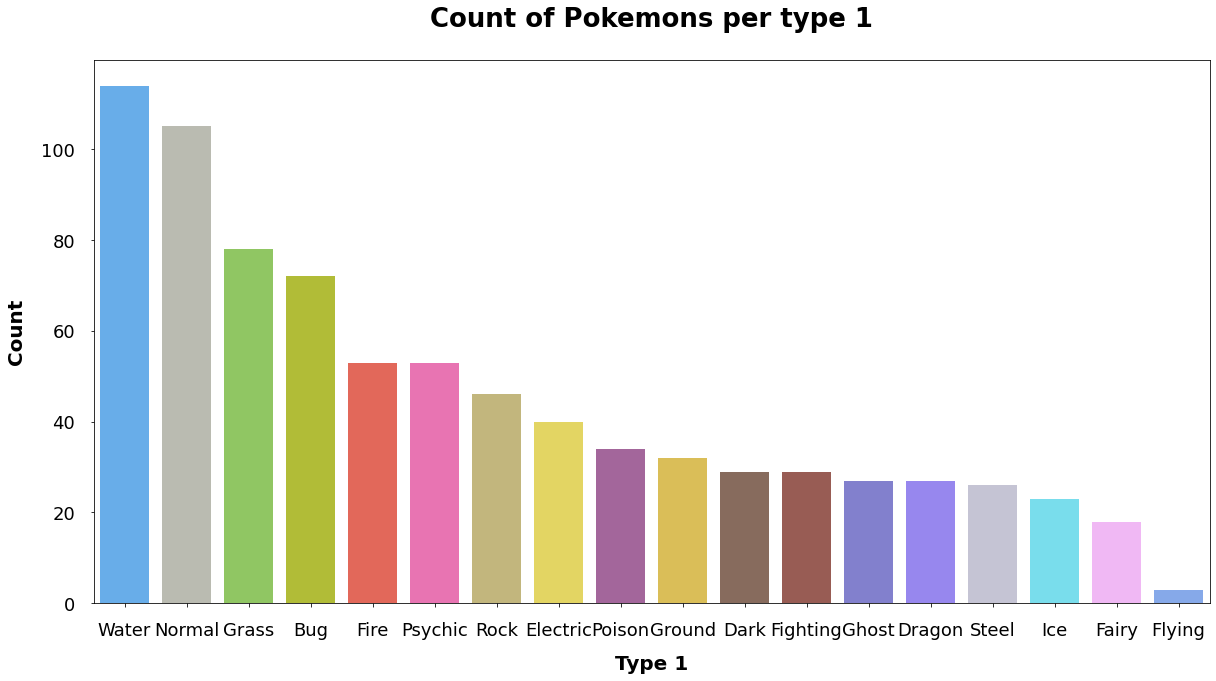

In [25]:
df = pokemon_df['Type1'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))


sns.barplot(df.index, df.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 1', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons per type 1',  size='26', weight='bold', y=1.05)

In [41]:
# Merging dfs
PokemonFinal_df = image_df.merge(label_df, on='Name')
PokemonFinal_df = PokemonFinal_df.drop(['Name', 'Type2'], axis=1)
PokemonFinal_df

,Filepath,Type1
0,/content/pokemon/images/buneary.png,Normal
1,/content/pokemon/images/skiddo.png,Grass
2,/content/pokemon/images/magikarp.png,Water
3,/content/pokemon/images/larvitar.png,Rock
4,/content/pokemon/images/archeops.png,Rock
...,...,...
716,/content/pokemon/images/vulpix.png,Fire
717,/content/pokemon/images/dragonair.png,Dragon
718,/content/pokemon/images/tauros.png,Normal
719,/content/pokemon/images/silcoon.png,Bug


In [43]:
PokemonFinal_df.shape

(721, 2)

In [44]:
# Limiting data to Fire and Water types
wfpoke_df = train_df.query("Type1 == 'Fire' | Type1 == 'Water'")
wfpoke_df

,Filepath,Type1
2,/content/pokemon/images/magikarp.png,Water
7,/content/pokemon/images/pansear.png,Fire
9,/content/pokemon/images/slugma.png,Fire
11,/content/pokemon/images/squirtle.png,Water
12,/content/pokemon/images/poliwrath.png,Water
...,...,...
687,/content/pokemon/images/tentacool.png,Water
701,/content/pokemon/images/wailmer.png,Water
702,/content/pokemon/images/poliwhirl.png,Water
704,/content/pokemon/images/palkia.png,Water


In [45]:
wfpoke_df['Type1'].value_counts()

Water    105
Fire      47
Name: Type1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.05, 'Count of Water and Fire Pokemons')

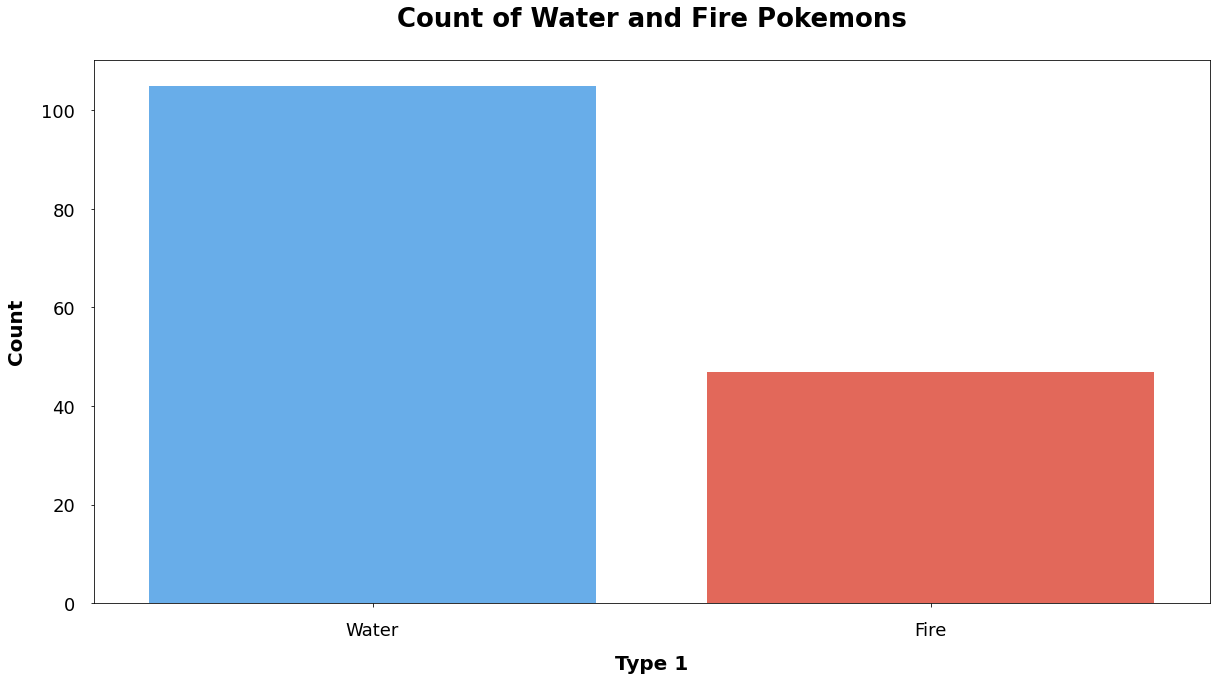

In [35]:
df = wfpoke_df['Type1'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))


sns.barplot(df.index, df.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 1', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Water and Fire Pokemons',  size='26', weight='bold', y=1.05)

In [49]:
wfpoke_df.Type1.value_counts(normalize=True)

Water    0.690789
Fire     0.309211
Name: Type1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.05, 'Percentage of Water and Fire Pokemons Distribution')

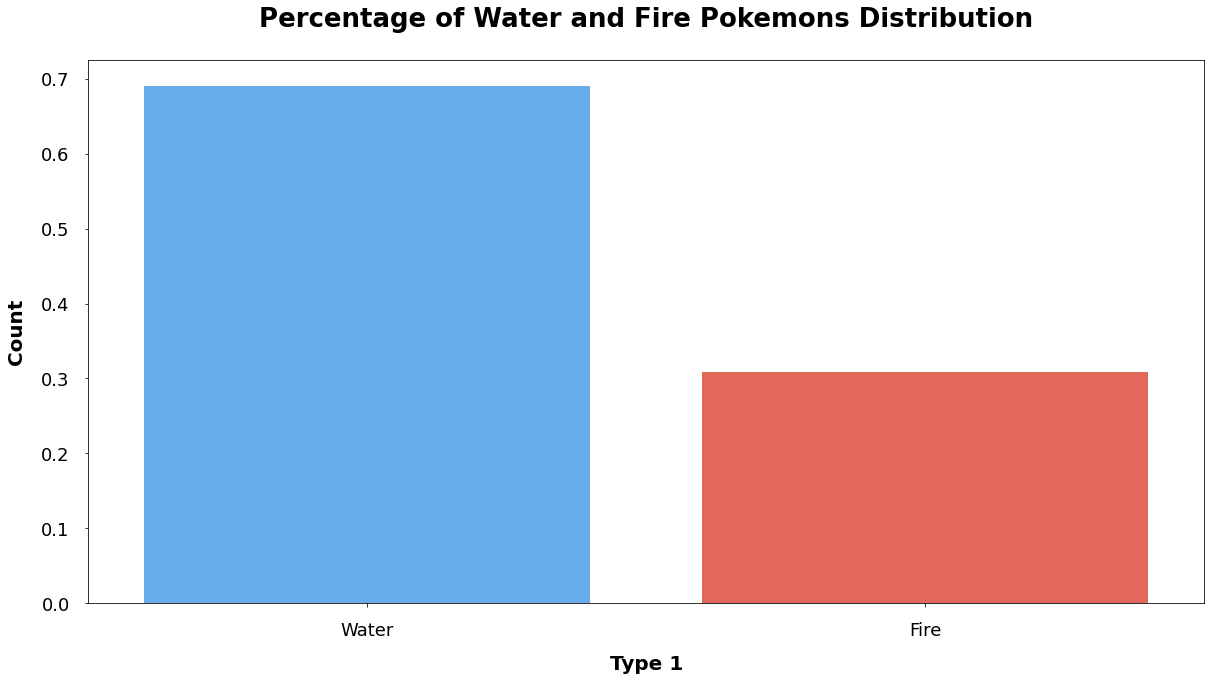

In [51]:
df = wfpoke_df.Type1.value_counts(normalize=True)
fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.barplot(df.index, df.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 1', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Percentage of Water and Fire Pokemons Distribution',  size='26', weight='bold', y=1.05)